<a href="https://colab.research.google.com/github/jalalrahmanov/Diabet/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston House Prices
About Dataset
Context
To Explore more on Regression Algorithm

Content
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): 

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

1https://archive.ics.uci.edu/ml/datasets/Housing

123

20.2. Load the Dataset 124

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ﬁve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in $1000s 
We can see that the input attributes have a mixture of units.

Acknowledgements

Thanks to Dr.Jason


Referenced: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Boston House Price Dataset

In [2]:
house_price_dataset = sklearn.datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
house_price_dataset    #data is loaded

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [8]:
# Loading the dataset to a Pandas DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)   #columns are names of columns

In [13]:
# First 5 rows of our dataset
house_price_dataframe.head()

#Let's add target to our dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
#add the target(price) column to dataset
house_price_dataframe['price'] = house_price_dataset.target

In [15]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
# check sheape of dataframe because of data understanding
house_price_dataframe.shape

(506, 14)

Creating copy of our dataframe

In [19]:
df = house_price_dataframe.copy()

## Data Pre Processing

In [22]:
# check for missing values
df.isnull().sum()   #no missing vales

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [24]:
# statistical measures of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## Understanding the correlation various features in the dataset

In [25]:
correlation = df.corr()

In [27]:
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


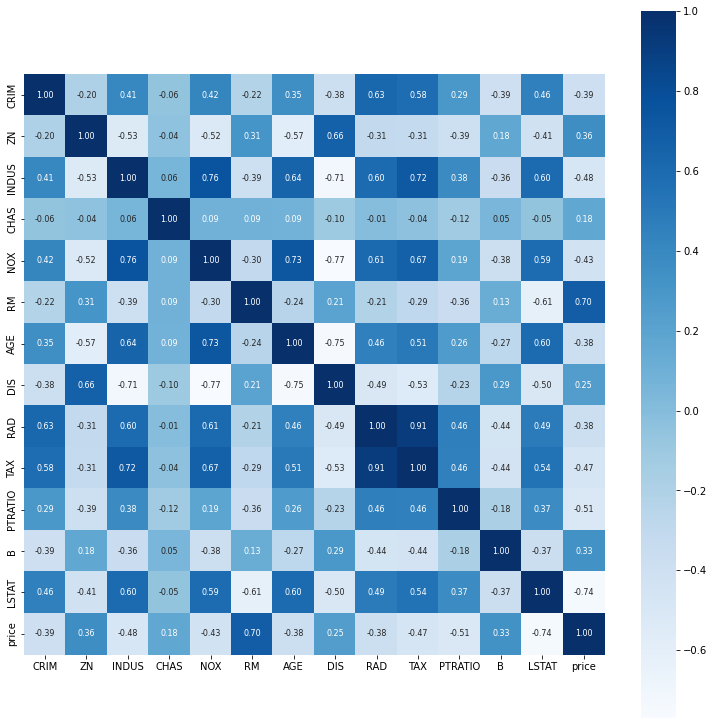

In [38]:
#let's visualize this
plt.figure(figsize=(13,13))
sns.heatmap(data = correlation, cmap = 'Blues', annot = True, fmt = '.2f', annot_kws={'size':8}, square=True)

## Splitting the data and Target(Price)

In [49]:
X = df.drop(['price'], axis=1)
y = df['price']

In [50]:
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [51]:
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64


## Splitting the data into train data and test data

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [58]:
print(X.shape, X_train.shape , X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(506, 13) (379, 13) (127, 13)
(506,) (379,) (127,)



# Model training
XGBoost Regressor

In [59]:
# loading the model
model = XGBRegressor()

In [61]:
#training the model with X_train
model.fit(X_train, y_train)

[16:18:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

### Evaluation

Prediction on training data

In [84]:
# accuracy for prediction on trainin data
tr_pred = model.predict(X_train)

In [85]:
print(tr_pred)

[38.684055  15.694934  46.310303  16.231567  23.250969  18.17934
 19.075863  15.080062  17.856012  20.92591   31.692257  28.49417
 16.318617  17.051136  23.432167  20.025873  18.492716   8.602248
 21.27354   17.427992  14.903193  14.000003  47.791435  14.652779
 16.150368  27.431786  21.56131   20.536253  22.093855  17.049341
 23.407879  33.714397   7.0463285 25.914728  19.301714  20.686262
 23.468729  22.492622  20.43052   46.802956  16.739948  16.99906
 20.373634  19.46186   20.512796  22.21731   39.105976  20.975748
 19.203718  21.80345   29.51324   36.806995  23.990301  13.970593
 13.745226  11.238584  16.817291  31.329306  28.32458   13.60778
 12.812583  48.29582   20.810991  19.922806  22.643034  19.709534
 13.940324   7.7961564 30.549551  26.988497  18.999495  15.061048
 14.195431  23.256033  18.567953  27.0116    35.374485  22.82912
 22.354996  23.782629  50.438583  32.36064   33.07083   24.434605
 23.330189  14.7543545 41.865906  21.1337    31.877201  23.458717
 20.954762  20.

In [86]:
# R squared error - in classification acc score is generally used, for Regression RSE and MAE(mean absolute error)
tr_rse_value = metrics.r2_score(y_train, tr_pred)
# In shortly will find the variance between two values. Should be close to 0

tr_mae_value = metrics.mean_absolute_error(y_train, tr_pred)
# find difference between all values and will give mean value difference value

print("R squared error:", tr_rse_value)
print("Mean absolute error:", tr_mae_value)

R squared error: 0.9757544258022435
Mean absolute error: 1.1182230843717629


Visualizing the actual Prices and predicted prices

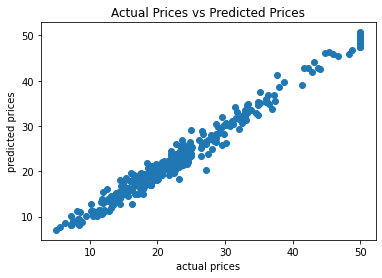

In [92]:
plt.scatter(y_train, tr_pred)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

Prediction on test data

In [87]:
# accuracy for prediction on test data
ts_pred = model.predict(X_test)

In [88]:
print(ts_pred)

[23.016954  31.42364   16.173046  23.580927  17.46015   22.1714
 18.314796  14.029961  20.737488  21.180895  20.44529   18.690483
  8.321284  21.453217  20.421919  24.553173  19.685305  10.205381
 44.475704  15.940252  23.858517  23.737234  13.884621  20.765696
 15.456101  16.24305   21.799377  13.161657  19.93968   21.674849
 19.766438  23.370852  23.209932  19.655743  15.145709  16.75448
 32.84218   20.021385  20.638344  23.61842   17.877428  30.510242
 43.739815  20.179007  22.488018  14.906468  16.279074  23.69828
 18.070068  26.881145  20.835695  35.763424  16.517195  25.812237
 47.97466   21.505997  16.060717  31.166424  21.966013  18.112715
 22.984049  34.817833  30.661045  19.36766   25.49301   18.369967
 14.297357  23.17898   28.338715  14.903171  21.480898  28.35976
 10.96798   21.158417  22.444817   7.4538136 20.583168  44.752457
 11.438277  13.292285  21.415586  11.619457  19.344286  10.624224
 19.948153  27.053463  16.849163  23.626413  25.075293  16.859615
 21.492283   9.

In [90]:
# R squared error
ts_rse_value = metrics.r2_score(y_test, ts_pred)

ts_mae_value = metrics.mean_absolute_error(y_test, ts_pred)

print("R squared error:", ts_rse_value)
print("Mean absolute error:", ts_mae_value)

R squared error: 0.8554991705577768
Mean absolute error: 2.126636110891508


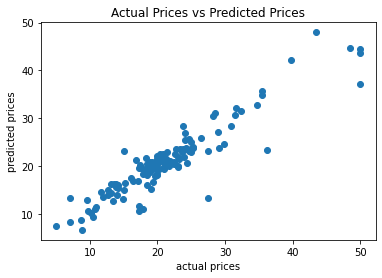

In [93]:
plt.scatter(y_test, ts_pred)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()